# Daten Präparation

## 1.Load der Python Pakete: 
Wie unter Punkt 1.1 Methoden beschrieben werden folgende Pakete benötigt und geladen

In [1]:
# Import the required libraries
import pandas as pd # Used for DataFrame
from google.colab import drive # Used for accessing the data on Google Drive
import matplotlib.pyplot as plt # Used to display the data using plots, charts, etc.
from scipy import stats # Used for statistical tests
import seaborn as sb # Used to display Box-Plots
# First we need to mount our Google Drive to access our files 
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.inspection import permutation_importance # Scikit-learn software machine learning library for the Python programming language. for classification, regression and clustering algorithms, 

# numeric library
import numpy as np

drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


## 2.Daten laden



Vorerst werden die TV-Nutzungsdaten (Figure 2. Data Flow Orange Felder)

In [2]:
# We have two files containing the results of surveys about Christmas Gifts Spending (one in 2020 and the other in 2021)
# Load the file paths in two variables

boosted= "/content/drive/MyDrive/CAS/Final Project/Colab/Werbeblöcke Instar boosted nach Update ab 1.1.22.xlsx"
nonboosted= "/content/drive/MyDrive/CAS/Final Project/Colab/Werbeblöcke Instar non-boosted ab 1.1.22.xlsx"


## 3.Datentypen anpassen, Variablen selektieren, Datensätze mergen

Nun werden die Datentypen angepasst, die Veriablen selektiert und dann die zwei Datensätzen aus den zwei verschiedenen Datenerhebungsverfahren so zusammengesetzt, dass Vergleiche möglich sind

In [3]:
# read data
header = 1 
df_boosted = pd.read_excel(boosted, header = header, sheet_name=1)
df_nonboosted = pd.read_excel(nonboosted, header = header, sheet_name=1)


In [4]:
#Select the relevant columns
df_s_boosted = df_boosted[['Datum', 'Sender', 'Dauer', 'Titel', 'Planzeit', 'CH-Inhaltscode','Standard-Inhaltscode', 'SendungsID', 'b Rt-T 3+' ]]
df_s_nonboosted = df_nonboosted[['Datum', 'Sender', 'Dauer', 'Titel', 'Planzeit', 'CH-Inhaltscode','Standard-Inhaltscode', 'SendungsID', 'nb Rt-T 3+' ]]

In [5]:
# Key für das mergen der Datansätze erstellen
df_s_boosted = df_s_boosted.astype({"Planzeit":'str',"Datum":'str'})
df_s_nonboosted = df_s_nonboosted.astype({"Planzeit":'str',"Datum":'str'})
df_s_boosted['helpkey'] = df_s_boosted[['Datum','Sender','Planzeit']].apply(''.join, axis=1)
df_s_nonboosted['helpkey'] = df_s_nonboosted[['Datum','Sender','Planzeit']].apply(''.join, axis=1)


In [6]:
#Kurze Übersicht
print(df_s_boosted.dtypes)
print(df_s_nonboosted.dtypes)

Datum                    object
Sender                   object
Dauer                    object
Titel                    object
Planzeit                 object
CH-Inhaltscode           object
Standard-Inhaltscode      int64
SendungsID                int64
b Rt-T 3+               float64
helpkey                  object
dtype: object
Datum                    object
Sender                   object
Dauer                    object
Titel                    object
Planzeit                 object
CH-Inhaltscode           object
Standard-Inhaltscode      int64
SendungsID                int64
nb Rt-T 3+              float64
helpkey                  object
dtype: object


In [7]:
# über den Key mergen
merge = df_s_nonboosted.merge(df_s_boosted, how='inner', on='helpkey')

In [8]:
#Doppelte Spalten bereiningen
df_s_merge = merge[['Datum_x', 'Sender_x', 'helpkey',  'Dauer_x', 'Titel_x', 'Planzeit_x', 'CH-Inhaltscode_x','Standard-Inhaltscode_x', 'SendungsID_x', 'b Rt-T 3+','nb Rt-T 3+']]

In [9]:
# Changing the datatype of Date, from
# Object to datetime64
df_s_merge = df_s_merge.astype({"SendungsID_x":'object', "Standard-Inhaltscode_x":'object', "Datum_x":'datetime64'})

In [10]:
# Setting the Date as index
df_s_merge['Datum']=df_s_merge['Datum_x']
df_s_merge = df_s_merge.set_index("Datum")

## 4.Variablen berechnen

In [11]:
# Aus Datum Jahr, Monat und Woche ableiten
df_s_merge['Datum'] = df_s_merge.index
df_s_merge['Year'] = df_s_merge['Datum'].dt.year
df_s_merge['Month'] = df_s_merge['Datum'].dt.month
df_s_merge['Week'] = df_s_merge['Datum'].dt.isocalendar().week

In [12]:
df_s_merge['Veränderung'] = df_s_merge['b Rt-T 3+'] - df_s_merge['nb Rt-T 3+']

## 5.Übersicht über das Analyse-File (Grundlage)

In [13]:
print(df_s_merge.dtypes)
df_s_merge

Datum_x                   datetime64[ns]
Sender_x                          object
helpkey                           object
Dauer_x                           object
Titel_x                           object
Planzeit_x                        object
CH-Inhaltscode_x                  object
Standard-Inhaltscode_x            object
SendungsID_x                      object
b Rt-T 3+                        float64
nb Rt-T 3+                       float64
Datum                     datetime64[ns]
Year                               int64
Month                              int64
Week                              UInt32
Veränderung                      float64
dtype: object


,Datum_x,Sender_x,helpkey,Dauer_x,Titel_x,Planzeit_x,CH-Inhaltscode_x,Standard-Inhaltscode_x,SendungsID_x,b Rt-T 3+,nb Rt-T 3+,Datum,Year,Month,Week,Veränderung
Datum,,,,,,,,,,,,,,,,
2022-01-01,2022-01-01,SRF 1,01.01.2022SRF 109:40:00,00:00:56,WERBUNG SRF 1 / 09:40,09:40:00,B31,9901000001,80884034,15.901589,12.070,2022-01-01,2022,1,52,3.831589
2022-01-01,2022-01-01,SRF 1,01.01.2022SRF 112:52:00,00:02:26,WERBUNG SRF 1 / 11:10,12:52:00,B31,9901000001,80884045,39.400195,33.916,2022-01-01,2022,1,52,5.484195
2022-01-01,2022-01-01,SRF 1,01.01.2022SRF 111:17:00,00:01:08,WERBUNG SRF 1 / 11:17,11:17:00,B34,9901000011,80884047,49.819677,47.938,2022-01-01,2022,1,52,1.881677
2022-01-01,2022-01-01,SRF 1,01.01.2022SRF 113:05:00,00:02:37,WERBUNG SRF 1 / 13:35,13:05:00,B31,9901000001,80884053,101.275029,102.926,2022-01-01,2022,1,52,-1.650971
2022-01-01,2022-01-01,SRF 1,01.01.2022SRF 114:15:00,00:00:48,WERBUNG SRF 1 / 13:45,14:15:00,B31,9901000001,80884058,74.599106,76.191,2022-01-01,2022,1,52,-1.591894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,2022-06-30,SRF info,30.06.2022SRF info1900-01-01 01:05:00,00:01:04,WERBUNG SRF INFO / 25:05,1900-01-01 01:05:00,B31,9901000001,83011332,5.344969,3.816,2022-06-30,2022,6,26,1.528969
2022-06-30,2022-06-30,SRF info,30.06.2022SRF info1900-01-01 01:38:00,00:01:05,WERBUNG SRF INFO / 25:38,1900-01-01 01:38:00,B38,9901000021,83011336,4.696300,3.816,2022-06-30,2022,6,26,0.880300
2022-06-30,2022-06-30,SRF info,30.06.2022SRF info1900-01-01 01:42:00,00:01:04,WERBUNG SRF INFO / 02:18,1900-01-01 01:42:00,B31,9901000001,83011344,4.557900,3.816,2022-06-30,2022,6,26,0.741900


# Modelle

## 1. Regression

In [14]:
  useful_fields = ['Standard-Inhaltscode_x',
                  'SendungsID_x', 'nb Rt-T 3+', 'Month',
                  'Week'
                  ]
  target_field = 'b Rt-T 3+'

In [15]:
  df_X = df_s_merge[useful_fields].copy()                              
  df_Y = df_s_merge[target_field].copy()

In [16]:
  x = df_X.to_numpy().astype(np.float32)
  y = df_Y.to_numpy().astype(np.float32)
  df = df_s_merge

In [17]:
print(x.shape, y.shape)

(297265, 5) (297265,)


,Datum_x,Sender_x,helpkey,Dauer_x,Titel_x,Planzeit_x,CH-Inhaltscode_x,Standard-Inhaltscode_x,SendungsID_x,b Rt-T 3+,nb Rt-T 3+,Datum,Year,Month,Week,Veränderung
Datum,,,,,,,,,,,,,,,,
2022-01-01,2022-01-01,SRF 1,01.01.2022SRF 109:40:00,00:00:56,WERBUNG SRF 1 / 09:40,09:40:00,B31,9901000001,80884034,15.901589,12.070,2022-01-01,2022,1,52,3.831589
2022-01-01,2022-01-01,SRF 1,01.01.2022SRF 112:52:00,00:02:26,WERBUNG SRF 1 / 11:10,12:52:00,B31,9901000001,80884045,39.400195,33.916,2022-01-01,2022,1,52,5.484195
2022-01-01,2022-01-01,SRF 1,01.01.2022SRF 111:17:00,00:01:08,WERBUNG SRF 1 / 11:17,11:17:00,B34,9901000011,80884047,49.819677,47.938,2022-01-01,2022,1,52,1.881677
2022-01-01,2022-01-01,SRF 1,01.01.2022SRF 113:05:00,00:02:37,WERBUNG SRF 1 / 13:35,13:05:00,B31,9901000001,80884053,101.275029,102.926,2022-01-01,2022,1,52,-1.650971
2022-01-01,2022-01-01,SRF 1,01.01.2022SRF 114:15:00,00:00:48,WERBUNG SRF 1 / 13:45,14:15:00,B31,9901000001,80884058,74.599106,76.191,2022-01-01,2022,1,52,-1.591894


train mse = 3.170617
test mse = 3.18848
train mae = -0.028165612
test mae = -0.017969925
train R2 = 0.9898557360492334
test R2 = 0.9878589881411012


[]

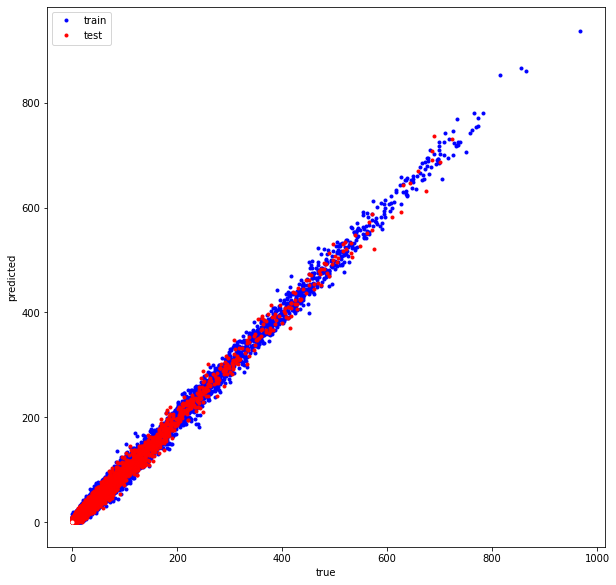

In [18]:
#Use linear regression mit Nutzungsmessung


# 1. make train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# 2. fit the model

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

# 3. evaluate MSE, MAE, and R2 on train and test datasets

y_p_train = reg.predict(x_train)
y_p_test = reg.predict(x_test)

print('train mse =', np.std(y_train - y_p_train))
print('test mse =', np.std(y_test - y_p_test))
print('train mae =', np.mean(y_train - y_p_train))
print('test mae =', np.mean(y_test - y_p_test))
print('train R2 =', reg.score(x_train, y_train))
print('test R2 =', reg.score(x_test, y_test))

# 4. plot y vs predicted y for test and train parts

plt.figure(figsize=(10,10))
plt.plot(y_train, y_p_train, 'b.', label='train')
plt.plot(y_test, y_p_test, 'r.', label='test')



plt.plot([0], [0], 'w.')  # dummy to have origin
plt.xlabel('true')
plt.ylabel('predicted')
plt.gca().set_aspect('equal')
plt.legend()
plt.plot()

In [19]:
  useful_fields = ['Standard-Inhaltscode_x',
                  'SendungsID_x', 'Month',
                  'Week'
                  ]
  target_field = 'b Rt-T 3+'

  df_X = df_s_merge[useful_fields].copy()                              
  df_Y = df_s_merge[target_field].copy()

  x = df_X.to_numpy().astype(np.float32)
  y = df_Y.to_numpy().astype(np.float32)

  print(x.shape, y.shape)

(297265, 4) (297265,)


train mse = 31.120901
test mse = 30.141754
train mae = -0.60709715
test mae = -0.66901743
train R2 = 0.0037541269328300597
test R2 = 0.0028812801000103194


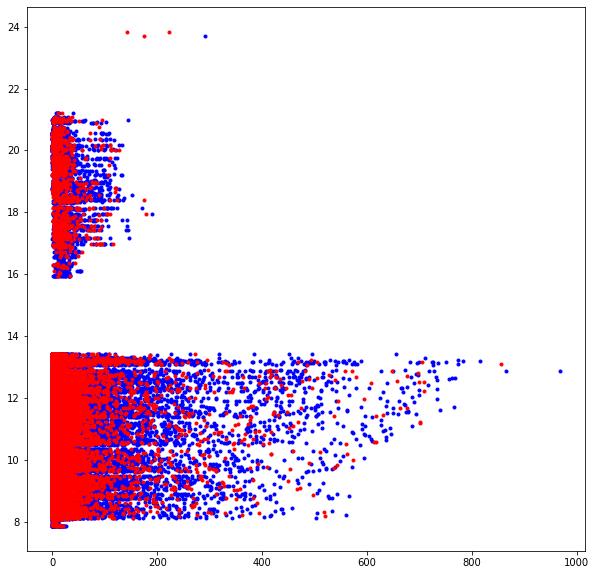

In [21]:
#Lineare Regression ohne Nutzungs-Messung 


# 1. make train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# 2. fit the model

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

# 3. evaluate MSE, MAE, and R2 on train and test datasets

y_p_train = reg.predict(x_train)
y_p_test = reg.predict(x_test)

print('train mse =', np.std(y_train - y_p_train))
print('test mse =', np.std(y_test - y_p_test))
print('train mae =', np.mean(y_train - y_p_train))
print('test mae =', np.mean(y_test - y_p_test))
print('train R2 =', reg.score(x_train, y_train))
print('test R2 =', reg.score(x_test, y_test))

# 4. plot y vs predicted y for test and train parts

plt.figure(figsize=(10,10))
plt.plot(y_train, y_p_train, 'b.', label='train')
plt.plot(y_test, y_p_test, 'r.', label='test')




## Feature Data z.B. für Random Forest

In [22]:
pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import requests

weather = requests.get('https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/switzerland/2022-01-01/2022-06-30?unitGroup=metric&include=days&key=SLAZFA6HLD82ZTLCVX34W7Z2U&contentType=csv')
print(weather)
if weather:
    print('Response OK')
else:
    print('Response Failed')

<Response [200]>
Response OK


In [24]:
df_weather = pd.read_csv(r'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/switzerland/2022-01-01/2022-06-30?unitGroup=metric&include=days&key=SLAZFA6HLD82ZTLCVX34W7Z2U&contentType=csv')


name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object


In [26]:
# Setting the Date as index
df_weather['Datum_x']=df_weather['datetime']
df_weather = df_weather.set_index("Datum_x")

In [27]:
df_weather

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
Datum_x,,,,,,,,,,,,,,,,,,,,,
2022-01-01,Schweiz,2022-01-01,11.2,-1.0,3.4,11.2,-1.0,3.3,1.5,88.4,...,5.4,3,NaN,2022-01-01T08:15:58,2022-01-01T16:51:50,0.99,Clear,Clear conditions throughout the day.,clear-day,"06635099999,06632099999,06638099999,0662809999..."
2022-01-02,Schweiz,2022-01-02,10.4,-2.0,4.1,10.4,-2.0,3.9,1.0,81.6,...,3.1,3,NaN,2022-01-02T08:15:57,2022-01-02T16:52:48,1.00,Clear,Clear conditions throughout the day.,clear-day,"06635099999,06632099999,06638099999,0662809999..."
2022-01-03,Schweiz,2022-01-03,11.5,8.5,9.9,11.5,7.5,9.2,3.8,65.7,...,2.5,2,NaN,2022-01-03T08:15:54,2022-01-03T16:53:48,0.00,Clear,Clear conditions throughout the day.,clear-day,"06635099999,06632099999,06638099999,0662809999..."
2022-01-04,Schweiz,2022-01-04,14.6,7.8,11.1,14.6,6.3,10.3,4.8,66.7,...,3.0,2,NaN,2022-01-04T08:15:47,2022-01-04T16:54:50,0.02,Rain,Clear conditions throughout the day with rain.,rain,"06635099999,06632099999,06638099999,0662809999..."
2022-01-05,Schweiz,2022-01-05,5.6,-1.1,1.5,4.9,-2.4,0.1,-1.7,80.1,...,2.7,2,NaN,2022-01-05T08:15:38,2022-01-05T16:55:53,0.05,"Snow, Rain",Clear conditions throughout the day with rain ...,rain,"06635099999,06632099999,06638099999,0662809999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-26,Schweiz,2022-06-26,25.8,15.1,20.1,25.8,15.1,20.1,15.9,78.8,...,22.7,9,30.0,2022-06-26T05:36:57,2022-06-26T21:29:12,0.97,Rain,Clear conditions throughout the day with early...,rain,"06635099999,06632099999,06638099999,0662809999..."
2022-06-27,Schweiz,2022-06-27,20.6,15.3,18.6,20.6,15.3,18.6,14.0,75.7,...,6.8,2,10.0,2022-06-27T05:37:22,2022-06-27T21:29:10,0.99,Rain,Clear conditions throughout the day with rain.,rain,"06635099999,06632099999,06638099999,0662809999..."
2022-06-28,Schweiz,2022-06-28,18.2,12.8,16.0,18.2,12.8,16.0,14.0,88.1,...,6.9,3,10.0,2022-06-28T05:37:50,2022-06-28T21:29:06,1.00,Rain,Clear conditions throughout the day with rain ...,rain,"06635099999,06632099999,06638099999,0662809999..."
